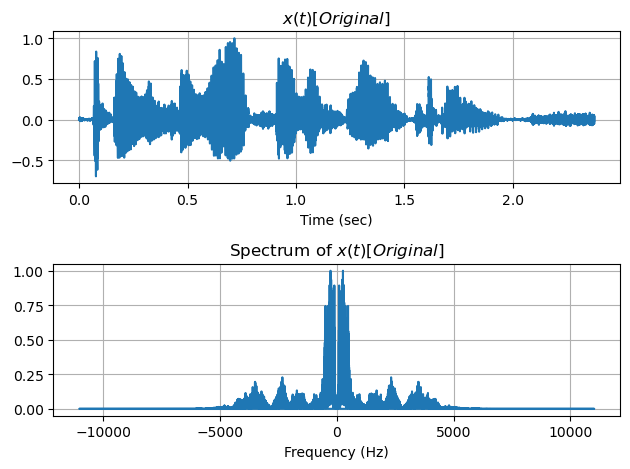

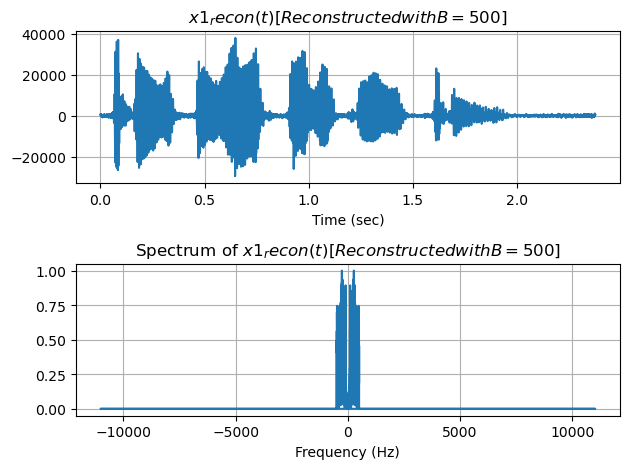

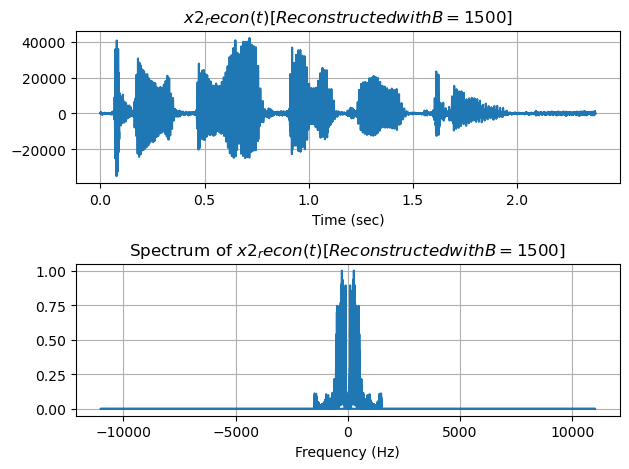

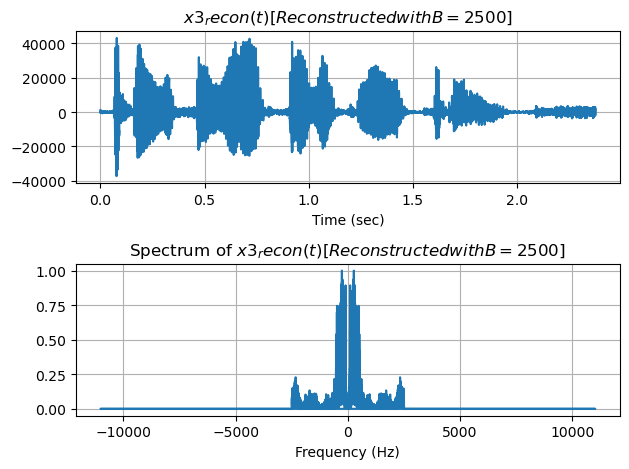

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as ft
import scipy.io.wavfile as wav

pi=np.pi
plt.rcParams['axes.grid']
plt.close('all')

def plot_time_freq(x,fs,sig):
    X=ft.fft(x)
    f=ft.fftfreq(len(x),1/fs)
    fig,axes=plt.subplots(2,1)
    axes[0].plot(t,x)
    axes[0].set_xlabel('Time (sec)')
    axes[0].set_title(sig)
    axes[0].grid('True')
    
    axes[1].plot(f,np.abs(X)/np.max(np.abs(X)))
    axes[1].set_xlabel('Frequency (Hz)')
    axes[1].set_title('Spectrum of '+sig)
    axes[1].grid('True')
    plt.tight_layout()
    plt.show()

    
fs, x = wav.read('x.wav')
x=x/np.max(x)


t=np.arange(0,len(x))/fs
plot_time_freq(x,fs,'$x(t) [Original] $')


f=ft.fftfreq(len(x),1/fs)
f2=f
f3=f
X1=ft.fft(x)
X2=ft.fft(x)
X3=ft.fft(x)

ind=np.argwhere((f>=0)&(f<500))
f=f[ind]
X1=X1[ind]
ind2=np.argwhere((f2>=0)&(f2<1500))
f2=f2[ind2]
X2=X2[ind2]
ind3=np.argwhere((f3>=0)&(f3<2500))
f3=f3[ind3]
X3=X3[ind3]

x1_recon=0

for k in np.arange(0,len(f)):
    A1=2*np.abs(X1[k])
    p1=np.angle(X1[k])
    x1_recon=x1_recon+A1*np.cos(2*pi*f[k]*t+p1)
    
wav.write('x1_recon.wav',fs, (x1_recon/np.max(x1_recon)).astype(np.float32))
plot_time_freq(x1_recon, fs, '$x1_recon(t) [Reconstructed with B=500] $')

x2_recon=0

for l in np.arange(0,len(f2)):
    A2=2*np.abs(X2[l])
    p2=np.angle(X2[l])
    x2_recon=x2_recon+A2*np.cos(2*pi*f2[l]*t+p2)
    
wav.write('x2_recon.wav',fs, (x2_recon/np.max(x2_recon)).astype(np.float32)) 
plot_time_freq(x2_recon,fs,'$x2_recon(t) [Reconstructed with B=1500]$')

x3_recon=0

for m in np.arange(0,len(f3)):
    A3=2*np.abs(X3[m])
    p3=np.angle(X3[m])
    x3_recon=x3_recon+A3*np.cos(2*pi*f3[m]*t+p3)
    
wav.write('x3_recon.wav',fs, (x3_recon/np.max(x3_recon)).astype(np.float32))
plot_time_freq(x3_recon,fs,'$x3_recon(t) [Reconstructed with B=2500]$')

C:\Users\Dwayne Fonseca\Signal-Reconstruction-and-Frequency-Band-Filtering-using-Fourier-Transform.ipynb
